In [23]:
import pandas as pd
import statsmodels.formula.api as smf


In [24]:
df = pd.read_csv('../data/raw/mtcars.csv')

In [25]:
model = smf.ols(formula="mpg ~ wt", data=df)
result = model.fit()

In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           1.29e-10
Time:                        14:31:36   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

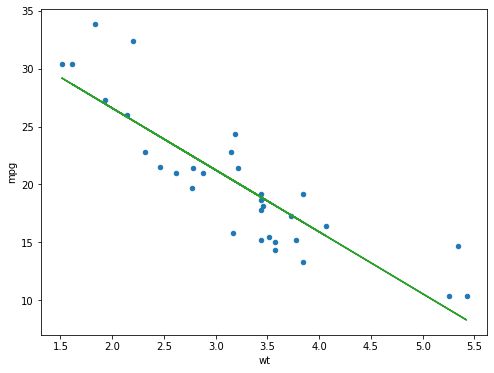

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

df.plot.scatter(x='wt', y='mpg', figsize=(8, 6))
plt.plot(df.wt, result.fittedvalues, 'C2')


In [28]:
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(result, alpha=0.00001)

#Get the confidence intervals
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

df["fittedvalues"] = fittedvalues
df["predict_ci_low"] = predict_ci_low
df["predict_ci_upp"] = predict_ci_upp
df["predict_mean_ci_low"] = predict_mean_ci_low
df["predict_mean_ci_upp"] = predict_mean_ci_upp

Z = df.sort_values('wt')

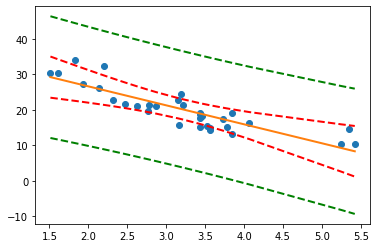

In [29]:
x = Z.wt
#Plot confidence intervals and data points
plt.plot(x, Z.mpg, 'o')
plt.plot(x, Z.fittedvalues, '-', lw=2)
plt.plot(x, Z.predict_ci_low, 'g--', lw=2)
plt.plot(x, Z.predict_ci_upp, 'g--', lw=2)
plt.plot(x, Z.predict_mean_ci_low, 'r--', lw=2)
plt.plot(x, Z.predict_mean_ci_upp, 'r--', lw=2)
plt.show()